# How To Use This Tool
(For those new to Google Colab Notebooks)

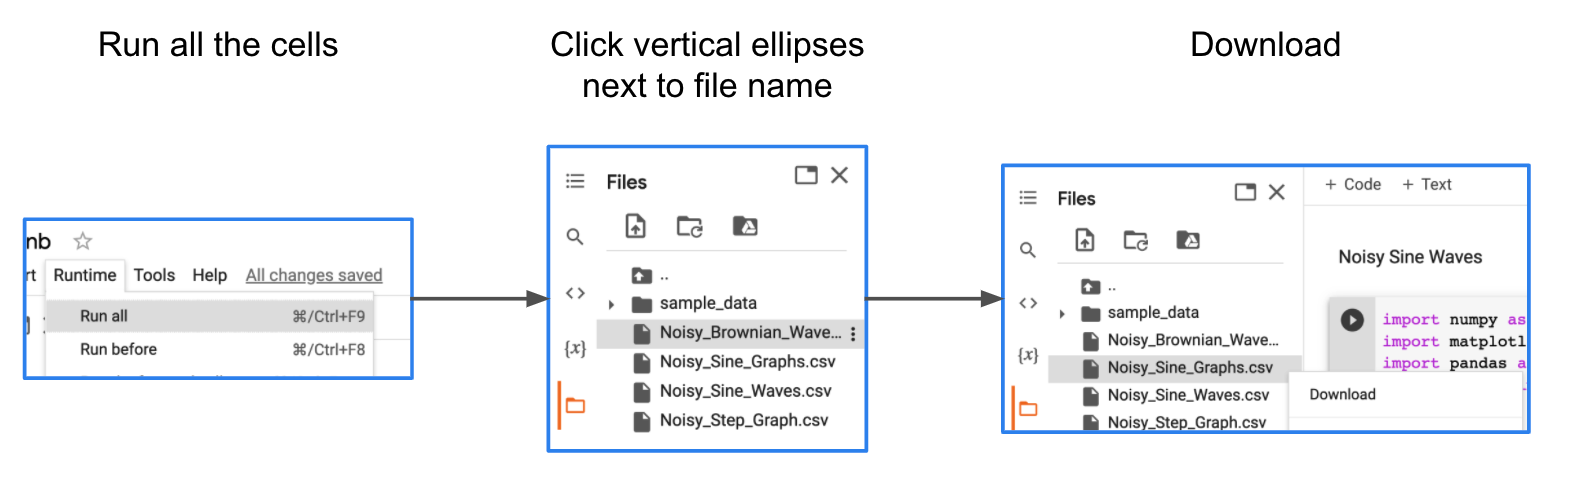

# Overview

This tool generates some noisy graphs and saves them as CSV's. There are definitely some ways to improve this tool (i.e. comments, throwing this into github), but I was assuming that was out of the scope of this task.

Noisy Sine Waves

,Sine_Wave_1,Sine_Wave_2,Sine_Wave_3,Sine_Wave_4,Sine_Wave_5,Sine_Wave_6
2022-03-01 00:00:00,29.445093,45.407066,59.622153,79.575780,105.986919,115.080459
2022-03-01 00:15:00,20.786073,31.253645,53.692734,76.702980,102.118013,109.797597
2022-03-01 00:30:00,12.858762,30.924000,68.832716,82.924316,91.547503,117.874772


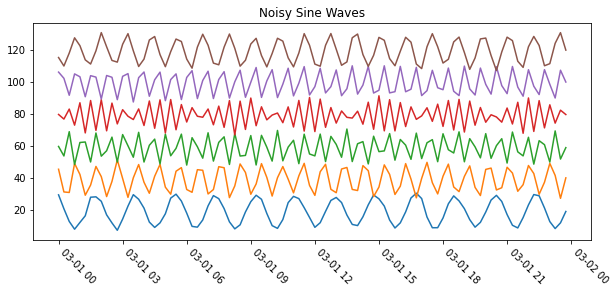

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

amplitude = 10
number_of_waves = 24
num_points = 24*4 # 6 hrs * 15min increments
df = None

for i in range(1, 7):
    np.random.seed(i)
    noise = np.random.normal(-1, 1, num_points)

    start = np.random.normal(-1, 1, 1)[0]
    x = np.linspace(start, number_of_waves, num_points)
    y = amplitude*np.sin(x*np.pi*i) 
    y += noise    # Noise
    y += 2*i*amplitude # Vertial Shift

    timestamps = pd.date_range("1-MAR-2022 00:00:00", 
                            "2-MAR-2022 00:00:00", 
                            #periods=num_points, 
                            freq="15T")[:len(y)]
    # print(len(y), len(timestamps))

    temp = pd.DataFrame({f"Sine_Wave_{i}":y}, index=timestamps)

    if df is None:
        df = temp
    else:
        df = pd.merge(df, temp, left_index=True, right_index=True)
display(df.head(3))

plt.figure(figsize=(10,4))
plt.plot(df)
plt.xticks(rotation=-45,  ha="left")
plt.title("Noisy Sine Waves")
plt.show()

df.to_csv("Noisy_Sine_Graphs.csv")

Brownian Motion

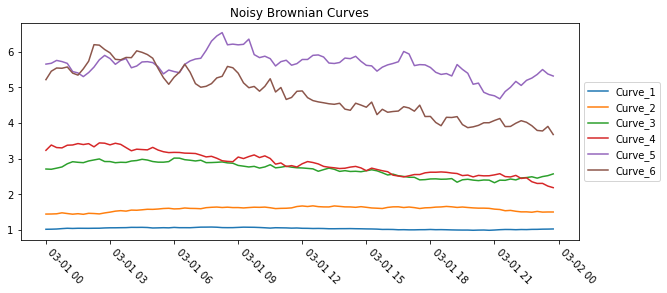

In [2]:
np.random.seed(0)
df_2 = pd.DataFrame(index=timestamps)

plt.figure(figsize=(10,4))
for i in range(1,7):
    pct_changes = np.random.normal(1, .005*i, len(timestamps))

    df_2[f"Curve_{i}"] = np.cumprod(pct_changes) * np.random.normal(i,.5, 1)[0] # Random Vertical Shift
    plt.plot(df_2[f"Curve_{i}"], label=f"Curve_{i}")

plt.xticks(rotation=-45,  ha="left")
plt.title("Noisy Brownian Curves")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

df_2.to_csv("Noisy_Brownian_Graphs.csv")

Noisy Step Functions

No handles with labels found to put in legend.


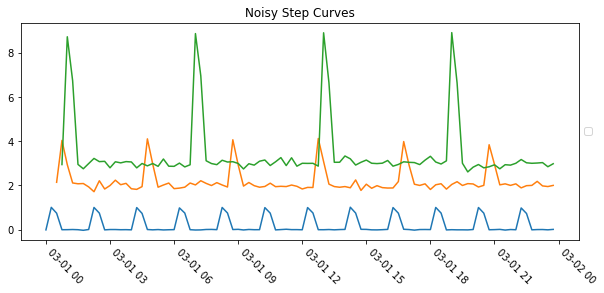

In [3]:
df_3 = pd.DataFrame(index=timestamps)

def noisy_step_func(index, min=0, max=1, std=.01, freq=2):
    if index.hour % freq == 0: 
        if index.minute == 0:
            return np.random.normal(min, std, 1)[0]
        elif index.minute == 15:
            return np.random.normal(max, std, 1)[0]
        elif index.minute == 30:
            return np.random.normal(.75*max, std, 1)[0]
        elif index.minute == 45:
            return np.random.normal(min, std, 1)[0]
    else:
        return np.random.normal(min, std, 1)[0]
        
df_3["Curve_1"] = [noisy_step_func(x) for x in df_3.index]
for i in range(2, 4):
    df_3[f"Curve_{i}"] = [noisy_step_func(x, min=i, max=i**2, std=i*5*.01, freq=2*i) 
                          for x in df_3.index]
    df_3[f"Curve_{i}"] = df_3[f"Curve_{i}"].shift(i)
    


plt.figure(figsize=(10,4))
plt.plot(df_3)

plt.xticks(rotation=-45,  ha="left")
plt.title("Noisy Step Curves")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

df_3.to_csv("Noisy_Step_Graph.csv")